# Explore here

In [17]:
import pandas as pd

df = pd.read_csv('../data/raw/BD.csv', sep=';', encoding='latin1')

df

,Fecha Real,Maquina,Causa,Tipo,Subtipo,Familia de Producto,Turno en el que se presenta la falla,Tiempo del paro (min)
0,ene-16,L1,Cambios,Cambio de empacadora,CAMBIO PRODUCTO,ULTRAINVISIBLE RAPISEC,2,65
1,ene-16,L1,Cambios,Cambio de empacadora,CAMBIO REFERENCIA,EXTRAPROTECCIÓN,1,49
2,ene-16,L1,Cambios,Cambio de empacadora,CAMBIO REFERENCIA,EXTRAPROTECCIÓN,3,175
3,ene-16,L1,Cambios,Cambio de empacadora,CAMBIO REFERENCIA,EXTRAPROTECCIÓN,1,74
4,ene-16,L1,Cambios,Cambio de empacadora,CAMBIO REFERENCIA,ULTRAINVISIBLE RAPISEC,2,179
...,...,...,...,...,...,...,...,...
70204,mar-17,L4,Paros,Paro por reventado,AUT_10058_MOL_AUSENCIA PULPA 1,DIARIOS NORMAL,2,2
70205,mar-17,L4,Paros,Paro por reventado,AUT_10058_MOL_AUSENCIA PULPA 1,DIARIOS NORMAL,2,2
70206,mar-17,L4,Paros,Paro por reventado,AUT_10058_MOL_AUSENCIA PULPA 1,DIARIOS NORMAL,1,1
70207,mar-17,L4,PAROS POR FUERZA MAYOR,Corte de energía,NaN,DIARIOS NORMAL,2,134


In [18]:
#Para revisar en qué columnas yo tengo un valor nulo
for column in df.columns:
    nulls = df[column].isnull().sum()
    if nulls > 0:
        print(column)

print('tengo nulos en todas estas columnas')

Subtipo
tengo nulos en todas estas columnas


In [19]:
#Ahora a borrar filas con nulos:
df = df.dropna()
df


,Fecha Real,Maquina,Causa,Tipo,Subtipo,Familia de Producto,Turno en el que se presenta la falla,Tiempo del paro (min)
0,ene-16,L1,Cambios,Cambio de empacadora,CAMBIO PRODUCTO,ULTRAINVISIBLE RAPISEC,2,65
1,ene-16,L1,Cambios,Cambio de empacadora,CAMBIO REFERENCIA,EXTRAPROTECCIÓN,1,49
2,ene-16,L1,Cambios,Cambio de empacadora,CAMBIO REFERENCIA,EXTRAPROTECCIÓN,3,175
3,ene-16,L1,Cambios,Cambio de empacadora,CAMBIO REFERENCIA,EXTRAPROTECCIÓN,1,74
4,ene-16,L1,Cambios,Cambio de empacadora,CAMBIO REFERENCIA,ULTRAINVISIBLE RAPISEC,2,179
...,...,...,...,...,...,...,...,...
70202,mar-17,L4,Paros,Paro por reventado,AUT_10043_MPR_FALTA TRIM LADO DR,DIARIOS NORMAL,1,2
70203,mar-17,L4,Paros,Paro por reventado,AUT_10043_MPR_FALTA TRIM LADO DR,DIARIOS NORMAL,2,5
70204,mar-17,L4,Paros,Paro por reventado,AUT_10058_MOL_AUSENCIA PULPA 1,DIARIOS NORMAL,2,2
70205,mar-17,L4,Paros,Paro por reventado,AUT_10058_MOL_AUSENCIA PULPA 1,DIARIOS NORMAL,2,2


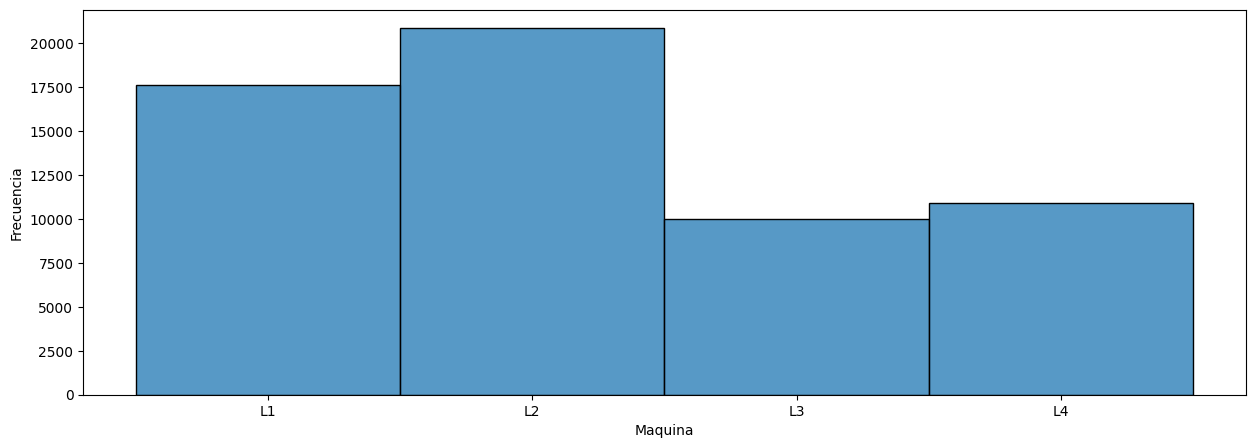

La máquina que presenta más desviaciones es la 2, luego la 1, luego la 4 y por último la 3


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(1, figsize=(15, 5))

sns.histplot(df['Maquina'], ax=axis).set(ylabel='Frecuencia')
plt.show()

print('La máquina que presenta más desviaciones es la 2, luego la 1, luego la 4 y por último la 3')

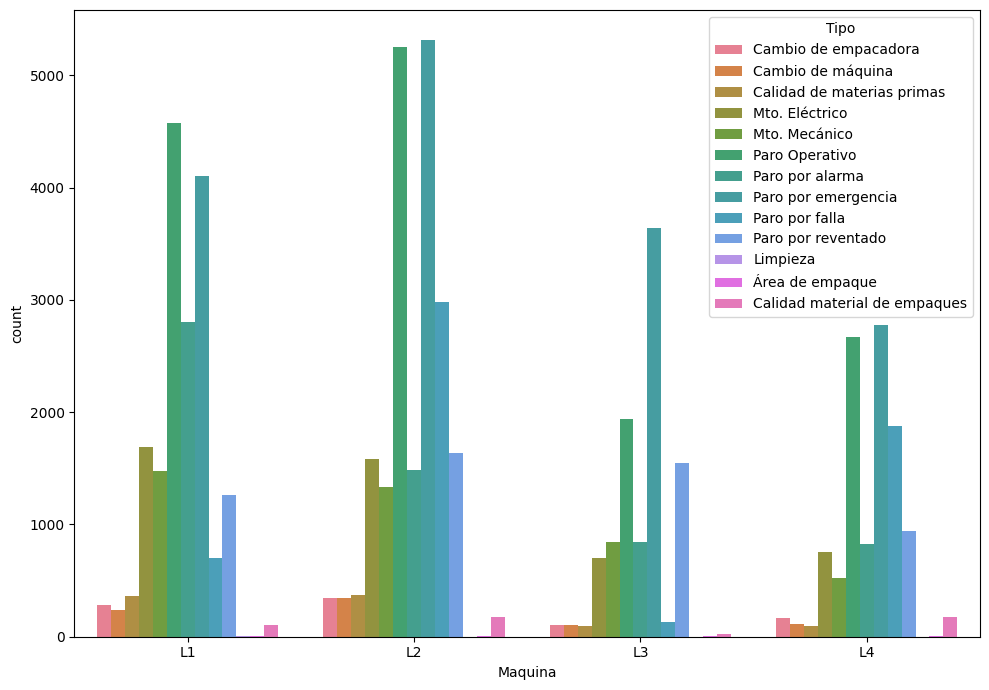

Las paradas se dan en su mayoría por paro por emergencia


In [31]:
#Análisis categórico - categórico

fig, ax = plt.subplots(figsize=(10, 7))
sns.countplot(data=df, x='Maquina', hue='Tipo')

plt.tight_layout()
plt.show()
print('Las paradas se dan en su mayoría por paro por emergencia')

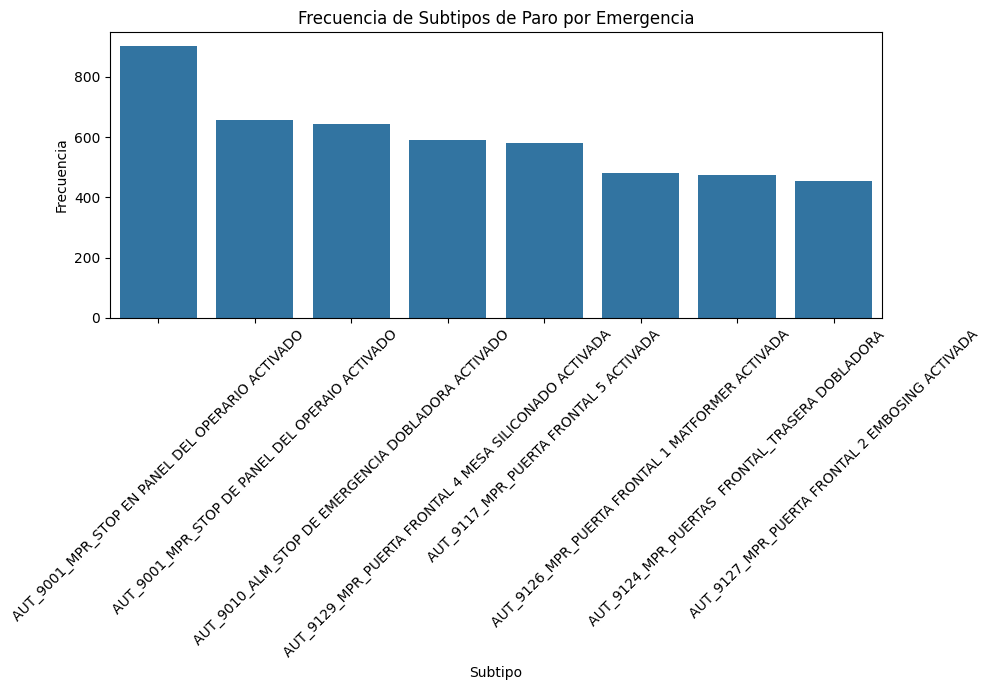

Los 7 top offenders en paro por emergencia se evidencian en este gráfico


In [34]:
#Ahora, sólo tomando la columna Tipo, los valores que tengan "Paro por emergencia", quiero ver qué valor tienen en la columna Subtipo
df[df['Tipo'] == 'Paro por emergencia']['Subtipo'].value_counts()
#Ahora haré un histograma con los subtipos de paro por emergencia pero sólo con los que tienen más de 100 ocurrencias
subtipo_counts = df[df['Tipo'] == 'Paro por emergencia']['Subtipo'].value_counts()
subtipo_counts = subtipo_counts[subtipo_counts > 450]
fig, ax = plt.subplots(figsize=(10, 7))
sns.barplot(x=subtipo_counts.index, y=subtipo_counts.values, ax=ax)
ax.set_xlabel('Subtipo')
ax.set_ylabel('Frecuencia')
ax.set_title('Frecuencia de Subtipos de Paro por Emergencia')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print('Los 7 top offenders en paro por emergencia se evidencian en este gráfico')


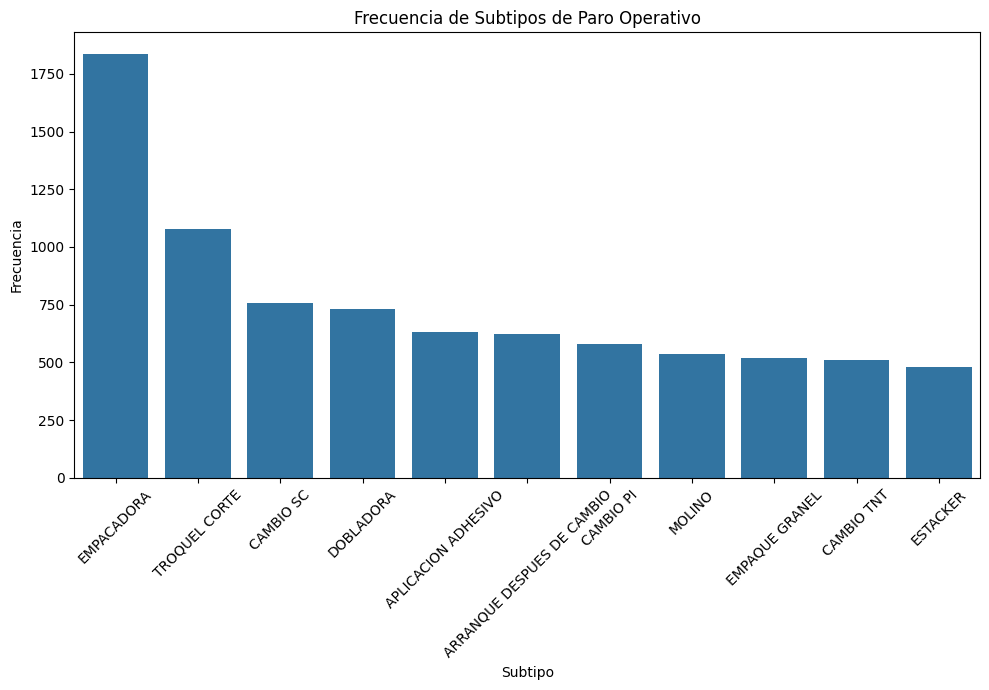

Los top offenders en paro operativo se evidencian en este gráfico


In [40]:
#Ahora, sólo tomando la columna Tipo, los valores que tengan "Paro por emergencia", quiero ver qué valor tienen en la columna Subtipo
df[df['Tipo'] == 'Paro Operativo']['Subtipo'].value_counts()
#Ahora haré un histograma con los subtipos de paro por emergencia pero sólo con los que tienen más de 100 ocurrencias
subtipo_counts = df[df['Tipo'] == 'Paro Operativo']['Subtipo'].value_counts()
subtipo_counts = subtipo_counts[subtipo_counts > 450]
fig, ax = plt.subplots(figsize=(10, 7))
sns.barplot(x=subtipo_counts.index, y=subtipo_counts.values, ax=ax)
ax.set_xlabel('Subtipo')
ax.set_ylabel('Frecuencia')
ax.set_title('Frecuencia de Subtipos de Paro Operativo')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print('Los top offenders en paro operativo se evidencian en este gráfico')
